In [43]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from io import StringIO

import fnmatch

In [44]:
output_dir = list(os.listdir('../output'))

In [45]:
df_template = pd.read_csv(StringIO("""package,time_elapsed,classifier,sample_size,strategy,dataset,accuracy_history,f1_history,id_bag"""))

In [46]:
df_aux = df_template[:]
for file in output_dir:
    df_aux = pd.concat([df_all,pd.read_csv('../output/' + file)])

In [47]:
df_aux['cost'] = df_aux.index

In [56]:
df["approach"] = df.apply(lambda x: "agnostic" if ((x.package == "upyhard") | (x.strategy == "Random Sampling"))  else "non agnostic", axis=1)

/mnt/c/Users/ahmou/Onedrive/Documentos/ubuntu_wd/act_len/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
pyhard_datasets = df_aux[df_aux.strategy == 'Expected Model Change']['dataset'].unique()

In [58]:
df_all = df_aux[df_aux.dataset.isin(pyhard_datasets)]

In [54]:
df_all['strategy'].value_counts()

Expected Model Change           6080
Lowest F3 Sampling              6080
Uncertain Sampling              6080
Highest LSC Sampling            6080
Lowest H, Highest U Sampling    6080
Lowest N1 Sampling              6080
Query by Committee              6080
Highest Usefulness Sampling     6080
Lowest Harmfulness Sampling     6080
Random Sampling                 5760
Name: strategy, dtype: int64

In [59]:
df_all

,package,time_elapsed,classifier,sample_size,strategy,dataset,accuracy_history,f1_history,id_bag,[LocalizedFileNames],cost
0,modAL,19.201510,5NN,0.433781,Expected Model Change,1050_pc3,0.881789,0.849002,0,NaN,0
1,modAL,19.201510,5NN,0.433781,Expected Model Change,1050_pc3,0.881789,0.846418,0,NaN,1
2,modAL,19.201510,5NN,0.433781,Expected Model Change,1050_pc3,0.881789,0.846418,0,NaN,2
3,modAL,19.201510,5NN,0.433781,Expected Model Change,1050_pc3,0.897764,0.849399,0,NaN,3
4,modAL,19.201510,5NN,0.433781,Expected Model Change,1050_pc3,0.881789,0.846418,0,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...
14,upyhard,234.494314,RF,1.000000,Lowest F3 Sampling,44_spambase,0.932682,0.925003,4,NaN,14
15,upyhard,234.494314,RF,1.000000,Lowest F3 Sampling,44_spambase,0.928339,0.918255,4,NaN,15
16,upyhard,234.494314,RF,1.000000,Lowest F3 Sampling,44_spambase,0.922910,0.922005,4,NaN,16
17,upyhard,234.494314,RF,1.000000,Lowest F3 Sampling,44_spambase,0.935939,0.921411,4,NaN,17


### Groupby por dataset

In [60]:
df = df_all[:]

In [61]:
# explode pelas colunas accuracy_history e f1_history
df = df.set_index(['package','time_elapsed','classifier','sample_size','strategy','dataset']).apply(pd.Series.explode).reset_index()

# explode retorna coluna como object, logo é necessário transformar em número
df['f1_history'] = pd.to_numeric(df['f1_history'])
df['accuracy_history'] = pd.to_numeric(df['accuracy_history'])

In [62]:
df \
.drop(['id_bag','cost'], axis=1) \
.groupby(['dataset','package','strategy', 'classifier']) \
.mean() \
.sort_values("f1_history", ascending = False)

time_elapsed  \
dataset                      package strategy                     classifier                 
1116_musk                    Pyhard  Highest Usefulness Sampling  NB            398.510766   
                             modAL   Query by Committee           NB            666.971499   
1462_banknote-authentication modAL   Query by Committee           RF           1021.249196   
1116_musk                    Pyhard  Lowest H, Highest U Sampling NB            394.117578   
1056_mc1                     Pyhard  Highest Usefulness Sampling  RF            264.718094   
...                                                                                    ...   
375_JapaneseVowels           upyhard Lowest F3 Sampling           5NN           355.729865   
40474_thyroid-allbp          Pyhard  Highest Usefulness Sampling  NB            159.743652   
                             upyhard Lowest F3 Sampling           NB            175.547247   
                             Pyhard  Lowest H, Highest U Sampling NB            157.866809   
375_JapaneseVowels           modAL   Random Sampling              5NN            68.122677   

                                                                              sample_size  \
dataset                      package strategy                     classifier                
1116_musk                    Pyhard  Highest Usefulness Sampling  NB             0.996779   
                             modAL   Query by Committee           NB             2.337981   
1462_banknote-authentication modAL   Query by Committee           RF             2.335277   
1116_musk                    Pyhard  Lowest H, Highest U Sampling NB             0.996779   
1056_mc1                     Pyhard  Highest Usefulness Sampling  RF             0.998547   
...                                                                                   ...   
375_JapaneseVowels           upyhard Lowest F3 Sampling           5NN            0.998996   
40474_thyroid-allbp          Pyhard  Highest Usefulness Sampling  NB             1.000000   
                             upyhard Lowest F3 Sampling           NB             1.000000   
                             Pyhard  Lowest H, Highest U Sampling NB             1.000000   
375_JapaneseVowels           modAL   Random Sampling              5NN            0.997892   

                                                                              accuracy_history  \
dataset                      package strategy                     classifier                     
1116_musk                    Pyhard  Highest Usefulness Sampling  NB                  0.994155   
                             modAL   Query by Committee           NB                  0.993644   
1462_banknote-authentication modAL   Query by Committee           RF                  0.993531   
1116_musk                    Pyhard  Lowest H, Highest U Sampling NB                  0.993668   
1056_mc1                     Pyhard  Highest Usefulness Sampling  RF                  0.993425   
...                                                                                        ...   
375_JapaneseVowels           upyhard Lowest F3 Sampling           5NN                 0.295851   
40474_thyroid-allbp          Pyhard  Highest Usefulness Sampling  NB                  0.228026   
                             upyhard Lowest F3 Sampling           NB                  0.216786   
                             Pyhard  Lowest H, Highest U Sampling NB                  0.214812   
375_JapaneseVowels           modAL   Random Sampling              5NN                 0.252227   

                                                                              f1_history  \
dataset                      package strategy                     classifier               
1116_musk                    Pyhard  Highest Usefulness Sampling  NB            0.994611   
                             modAL   Query by Committee           NB            0.993611   
14

In [63]:
df_all[df_all.strategy != 'Expected Error Reduction'] \
.drop(['dataset', 'id_bag','cost'], axis=1) \
.groupby(['package','strategy', 'classifier']) \
.mean() \
.sort_values("f1_history", ascending = False)

time_elapsed  sample_size  \
package strategy                     classifier                              
Pyhard  Highest LSC Sampling         RF            278.071816     0.996854   
modAL   Query by Committee           RF           1038.524783     2.339625   
Pyhard  Lowest H, Highest U Sampling RF            299.268168     0.996854   
        Highest Usefulness Sampling  RF            277.403201     0.996854   
        Lowest Harmfulness Sampling  RF            291.677288     0.996854   
        Lowest N1 Sampling           RF            263.938772     0.996854   
upyhard Lowest F3 Sampling           RF            286.907575     0.996854   
modAL   Expected Model Change        RF             73.392611     0.697055   
        Uncertain Sampling           RF             23.704500     0.269131   
Pyhard  Highest Usefulness Sampling  C4.5          170.211320     0.996854   
modAL   Query by Committee           C4.5           79.272245     2.339625   
Pyhard  Lowest H, Highest U Sampling C4.5          174.353376     0.996854   
        Highest LSC Sampling         C4.5          178.810871     0.996854   
modAL   Random Sampling              RF             52.296489     1.005627   
Pyhard  Lowest Harmfulness Sampling  C4.5          170.080372     0.996854   
        Lowest N1 Sampling           C4.5          178.872376     0.996854   
upyhard Lowest F3 Sampling           C4.5          183.681184     0.996854   
modAL   Expected Model Change        C4.5            9.139653     0.672615   
        Uncertain Sampling           C4.5            2.637626     0.080468   
        Random Sampling              C4.5            4.751127     1.005627   
        Uncertain Sampling           5NN            33.894398     0.279730   
Pyhard  Highest LSC Sampling         5NN           255.279346     0.996854   
        Highest Usefulness Sampling  5NN           248.741570     0.996854   
        Lowest H, Highest U Sampling 5NN           255.441142     0.996854   
modAL   Expected Model Change        5NN            67.876196     0.559315   
                                     NB              9.527671     0.482671   
Pyhard  Lowest Harmfulness Sampling  5NN           246.116089     0.996854   
        Lowest N1 Sampling           5NN           250.075433     0.996854   
modAL   Query by Committee           NB             92.928808     2.339625   
upyhard Lowest F3 Sampling           5NN           255.513237     0.996854   
modAL   Query by Committee           5NN           896.876721     2.339625   
        Random Sampling              NB              6.556189     1.005627   
        Uncertain Sampling           NB              3.712012     0.210694   
        Random Sampling              5NN            33.069462     1.005627   
Pyhard  Highest LSC Sampling         NB            181.148384     0.996854   
        Lowest N1 Sampling           NB            172.655119     0.996854   
        Lowest H, Highest U Sampling NB            176.854314     0.996854   
        Highest Usefulness Sampling  NB            171.668949     0.996854   
        Lowest Harmfulness Sampling  NB            174.954843     0.996854   
upyhard Lowest F3 Sampling           NB            187.729414     0.996854   

                                                 accuracy_history  f1_history  \
package strategy                     classifier                                 
Pyhard  Highest LSC Sampling         RF                  0.886565    0.892502   
modAL   Query by Committee           RF                  0.898915    0.891741   
Pyhard  Lowest H, Highest U Sampling RF                  0.885766    0.891235   
        Highest Usefulness Sampling  RF                  0.885677    0.890716   
        Lowest Harmfulness Sampling  RF                  0.880690    0.881734   
        Lowest N1 Sampling           RF                  0.878887    0.881480   
upyhard Lowest F3 Sampling           RF                  0.875620    0.876996   
modAL   Expected Model Change        RF    

In [64]:
df_all \
.drop(['id_bag','cost'], axis=1) \
.groupby(['dataset','package','strategy', 'classifier']) \
.std() \
.sort_values("f1_history", ascending = False)

time_elapsed  \
dataset           package strategy                     classifier                 
1050_pc3          Pyhard  Lowest H, Highest U Sampling NB              2.386096   
                  upyhard Lowest F3 Sampling           NB              2.564834   
                  Pyhard  Lowest Harmfulness Sampling  NB              1.048675   
                  modAL   Uncertain Sampling           NB              0.089361   
                  Pyhard  Highest LSC Sampling         NB              0.825930   
...                                                                         ...   
1535_volcanoes-b5 Pyhard  Lowest H, Highest U Sampling 5NN             5.945123   
1056_mc1          modAL   Uncertain Sampling           5NN             1.171525   
1535_volcanoes-b5 modAL   Expected Model Change        5NN             1.496164   
                          Uncertain Sampling           5NN             1.866875   
1056_mc1          upyhard Lowest F3 Sampling           5NN             2.357723   

                                                                   sample_size  \
dataset           package strategy                     classifier                
1050_pc3          Pyhard  Lowest H, Highest U Sampling NB             0.000000   
                  upyhard Lowest F3 Sampling           NB             0.000000   
                  Pyhard  Lowest Harmfulness Sampling  NB             0.000000   
                  modAL   Uncertain Sampling           NB             0.040650   
                  Pyhard  Highest LSC Sampling         NB             0.000000   
...                                                                        ...   
1535_volcanoes-b5 Pyhard  Lowest H, Highest U Sampling 5NN            0.000000   
1056_mc1          modAL   Uncertain Sampling           5NN            0.000000   
1535_volcanoes-b5 modAL   Expected Model Change        5NN            0.000000   
                          Uncertain Sampling           5NN            0.020128   
1056_mc1          upyhard Lowest F3 Sampling           5NN            0.000000   

                                                                   accuracy_history  \
dataset           package strategy                     classifier                     
1050_pc3          Pyhard  Lowest H, Highest U Sampling NB                  0.302925   
                  upyhard Lowest F3 Sampling           NB                  0.296758   
                  Pyhard  Lowest Harmfulness Sampling  NB                  0.279017   
                  modAL   Uncertain Sampling           NB                  0.288827   
                  Pyhard  Highest LSC Sampling         NB                  0.286490   
...                                                                             ...   
1535_volcanoes-b5 Pyhard  Lowest H, Highest U Sampling 5NN                 0.000279   
1056_mc1          modAL   Uncertain Sampling           5NN                 0.000000   
1535_volcanoes-b5 modAL   Expected Model Change        5NN                 0.000000   
                          Uncertain Sampling           5NN                 0.000000   
1056_mc1          upyhard Lowest F3 Sampling           5NN                 0.000000   

                                                                   f1_history  \
dataset           package strategy                     classifier               
1050_pc3          Pyhard  Lowest H, Highest U Sampling NB            0.341029   
                  upyhard Lowest F3 Sampling           NB            0.334108   
                  Pyhard  Lowest Harmfulness Sampling  NB            0.322793   
                  modAL   Uncertain Sampling           NB            0.318009   
                  Pyhard  Highest LSC Sampling         NB            0.317848   
...                                                                       ...   
1535_volcanoes-b5 Pyhard  Lowest H, Highest U Sampling 5NN           0.000108   
1056_mc1          modAL   Uncertain Sampling           5NN 

## Boxplot

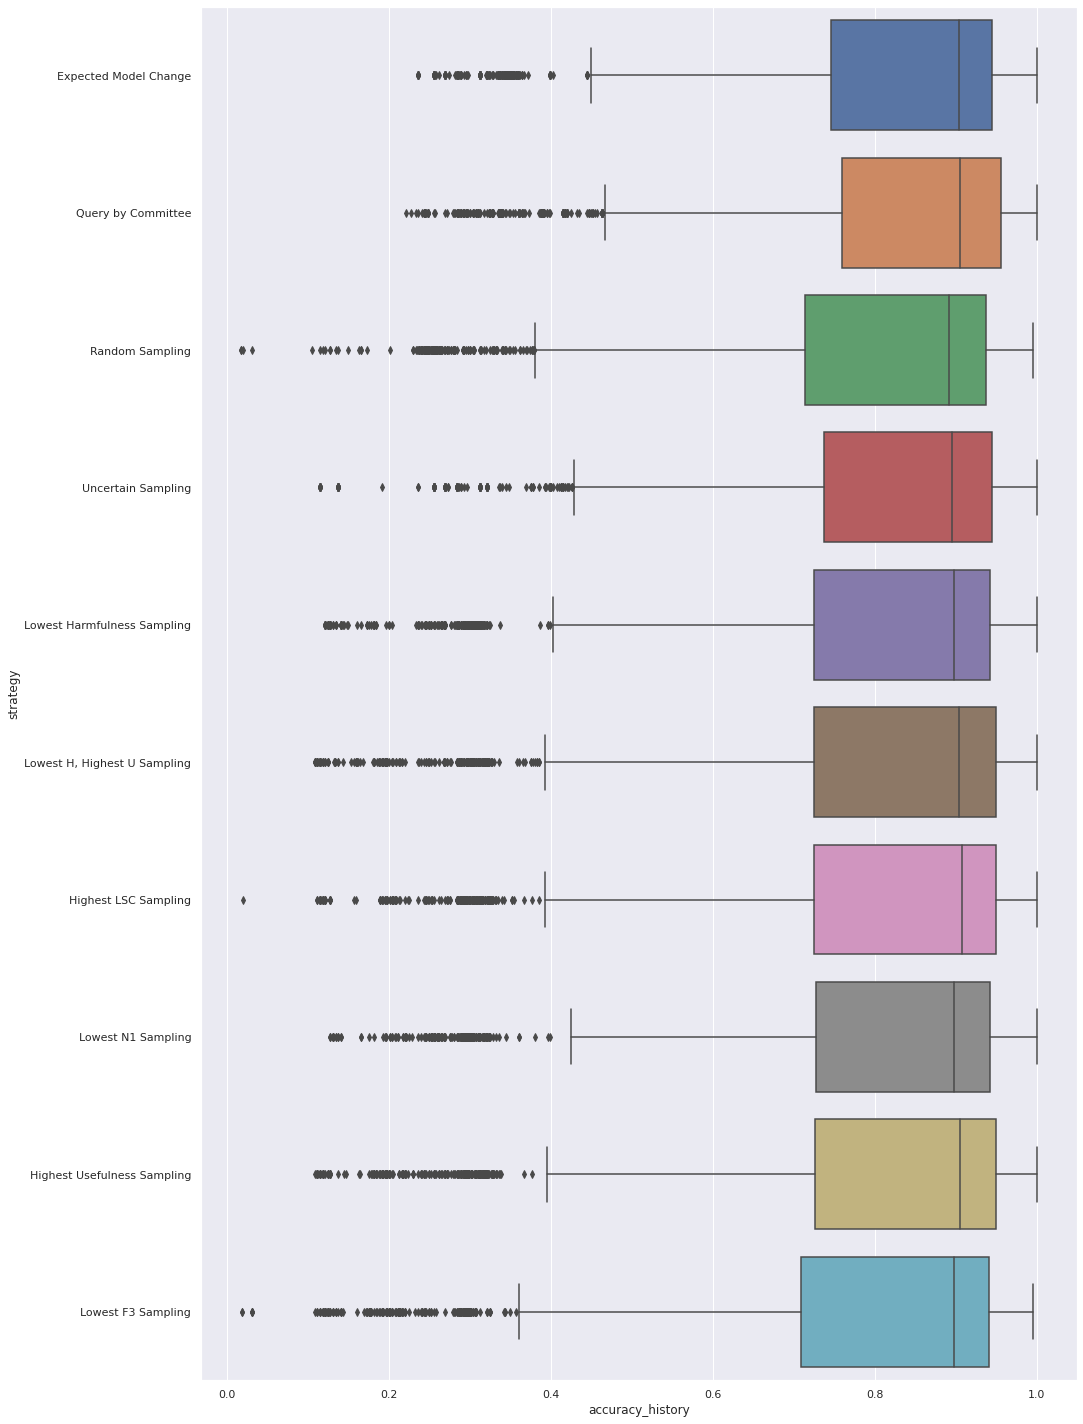

In [66]:
sns.set(rc={'figure.figsize':(15.7,25.27)})
ax = sns.boxplot(data=df_all, x="accuracy_history", y="strategy", orient="h")

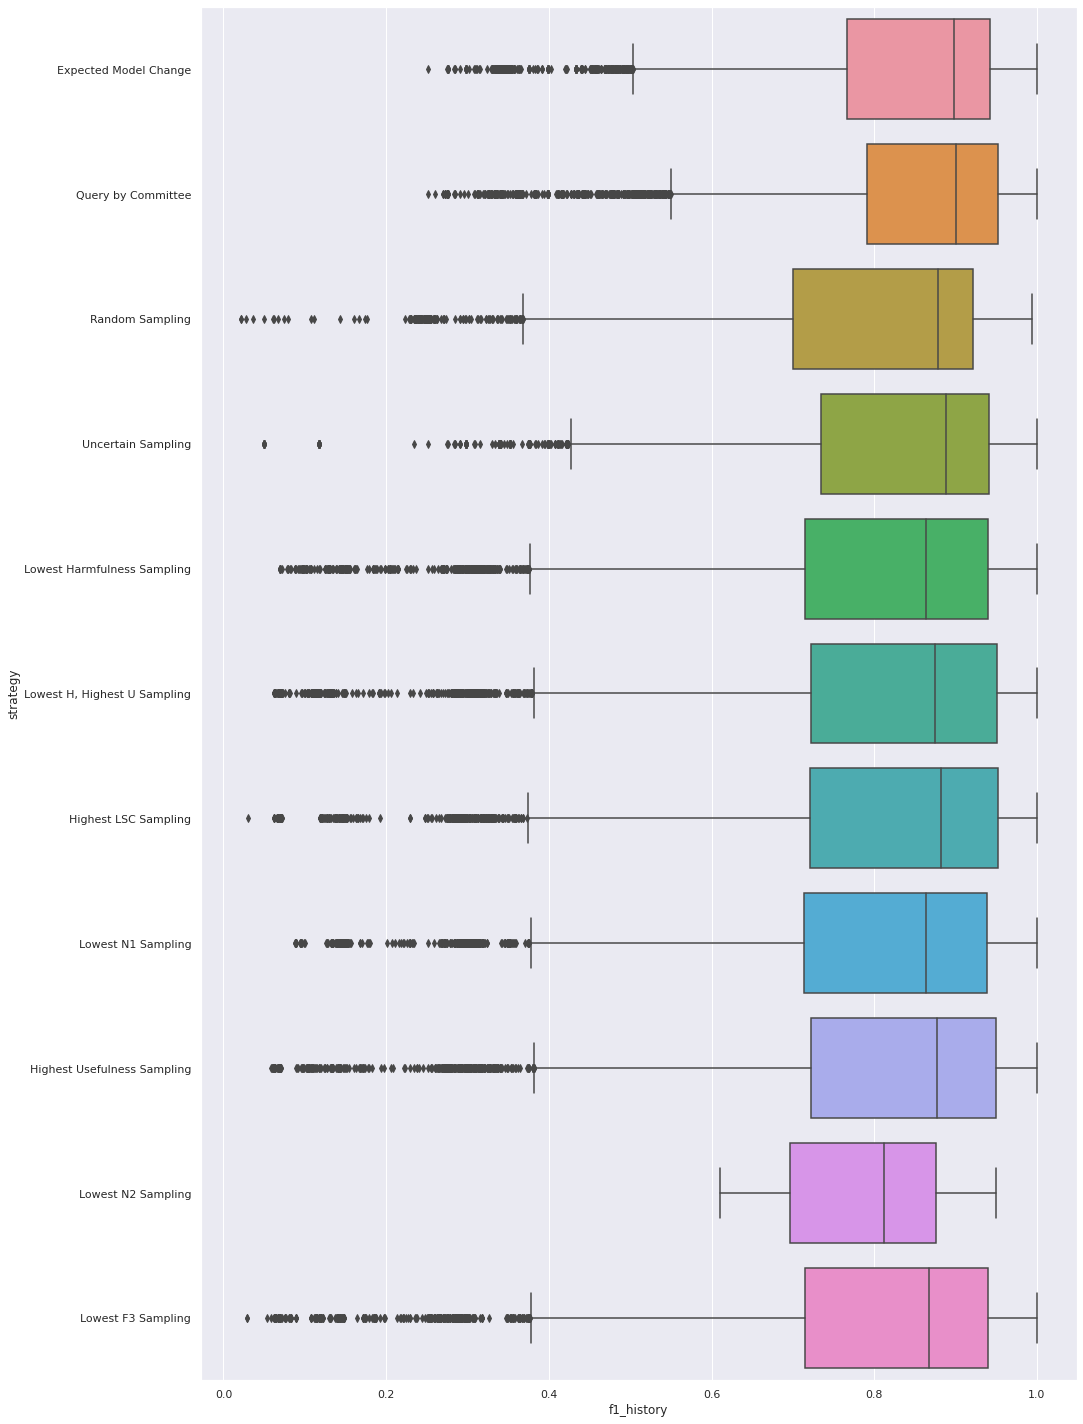

In [17]:
sns.set(rc={'figure.figsize':(15.7,25.27)})
ax = sns.boxplot(data=df_all, x="f1_history", y="strategy", orient="h"
                )

## Testes (lineplot)

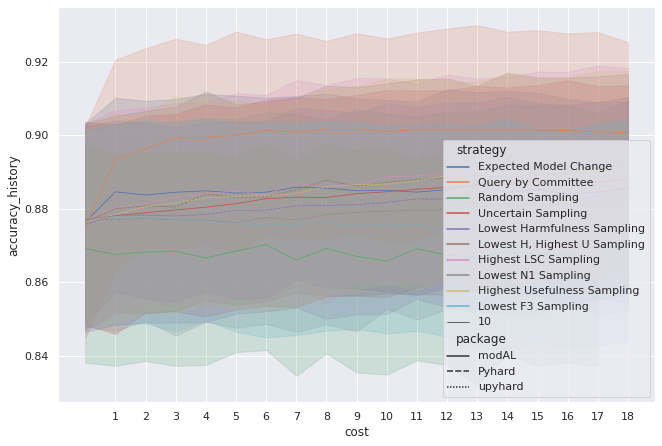

In [67]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10.7,7.27)})
_ = sns.lineplot(x="cost", y="accuracy_history",
             hue="strategy", style="package",
             data=df_all[(df_all.classifier == "RF") & (df_all.strategy != 'Expected Error Reduction') & (df_all.strategy != "Lowest N2 Sampling")], size=10).set_xticks(range(1,19))

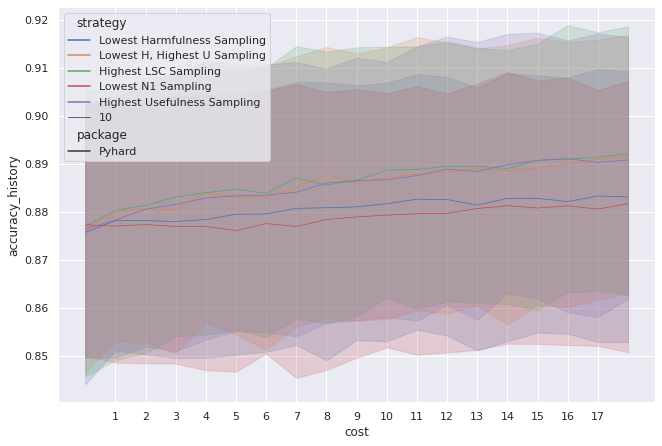

In [68]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10.7,7.27)})
_ = sns.lineplot(x="cost", y="accuracy_history",
             hue="strategy", style="package",
             data=df_all[(df_all.package == "Pyhard") & (df_all.classifier == "RF") & (df_all.strategy != 'Expected Error Reduction') & (df_all.strategy != "Lowest N2 Sampling")], size=10).set_xticks(range(1,18))

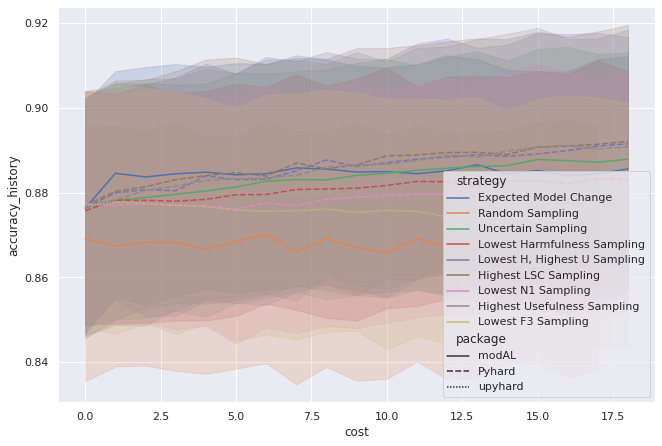

In [69]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10.7,7.27)})
_ = sns.lineplot(x="cost", y="accuracy_history",
             hue="strategy", style="package",
             data=df_all[(df_all.package != "baseline") & (df_all.strategy != "Query by Committee") & (df_all.classifier == "RF") & (df_all.strategy != 'Expected Error Reduction') & (df_all.strategy != "Lowest N2 Sampling")])

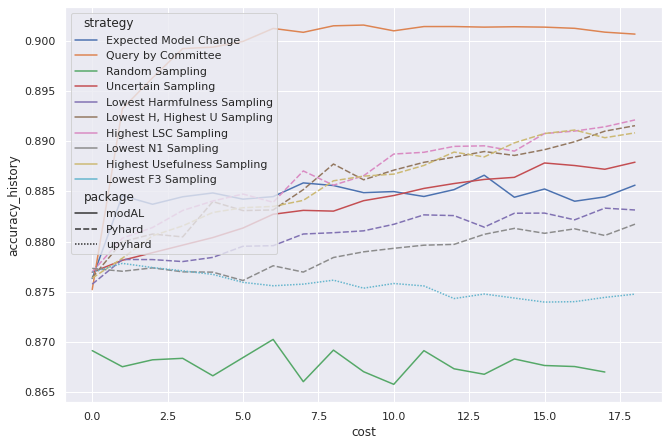

In [202]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10.7,7.27)})
_ = sns.lineplot(x="cost", y="accuracy_history",
             hue="strategy", ci=None, style="package",
             data=df_all[(df_all.classifier == "RF") & (df_all.strategy != "Lowest N2 Sampling")])

## Heatmap

In [90]:
df_all.groupby(['strategy','classifier']).std()

time_elapsed  sample_size  \
strategy                     classifier                              
Expected Model Change        5NN            46.291731     0.374828   
                             C4.5           21.445766     0.263089   
                             NB             21.181636     0.280279   
                             RF             15.428265     0.258835   
Highest LSC Sampling         5NN            77.479460     0.003982   
                             C4.5           75.717720     0.003982   
                             NB             58.699930     0.003982   
                             RF             82.100546     0.003982   
Highest Usefulness Sampling  5NN            81.382967     0.003982   
                             C4.5           62.288327     0.003982   
                             NB             62.110235     0.003982   
                             RF            139.741135     0.003982   
Lowest F3 Sampling           5NN            88.979470     0.003982   
                             C4.5           73.631495     0.003982   
                             NB             73.121464     0.003982   
                             RF             95.009181     0.003982   
Lowest H, Highest U Sampling 5NN            73.704529     0.003982   
                             C4.5           67.591853     0.003982   
                             NB             60.382270     0.003982   
                             RF            123.935797     0.003982   
Lowest Harmfulness Sampling  5NN            92.855211     0.003982   
                             C4.5           73.412428     0.003982   
                             NB             69.456997     0.003982   
                             RF            124.047626     0.003982   
Lowest N1 Sampling           5NN            73.777770     0.003982   
                             C4.5           79.603089     0.003982   
                             NB             62.889802     0.003982   
                             RF             80.722374     0.003982   
Query by Committee           5NN           585.805893     0.003641   
                             C4.5          158.794461     0.003641   
                             NB            151.257407     0.003641   
                             RF            152.941123     0.003641   
Random Sampling              5NN            23.859298     0.021624   
                             C4.5           10.585841     0.021624   
                             NB             15.856435     0.021624   
                             RF             12.206990     0.021624   
Uncertain Sampling           5NN            22.534180     0.222039   
                             C4.5            5.333650     0.005579   
                             NB              7.857247     0.218737   
                             RF              6.310784     0.164474   

                                         accuracy_history  f1_history  \
strategy                     classifier                                 
Expected Model Change        5NN                 0.200680    0.200488   
                             C4.5                0.134758    0.135415   
                             NB                  0.194165    0.193692   
                             RF                  0.125532    0.126173   
Highest LSC Sampling         5NN                 0.208982    0.207932   
                             C4.5                0.138833    0.124862   
                             NB                  0.222491    0.221795   
                             RF                  0.126960    0.111583   
Highest Usefulness Sampling  5NN                 0.209256    0.208321   
                             C4.5                0.139159    0.124354   
                             NB                  0.228400    0.228926   
                             RF                  0.126029    0.110230   
Lowest F3 Sampling           5NN                 0.220903    0.212501   
     

<AxesSubplot:xlabel='classifier', ylabel='strategy'>

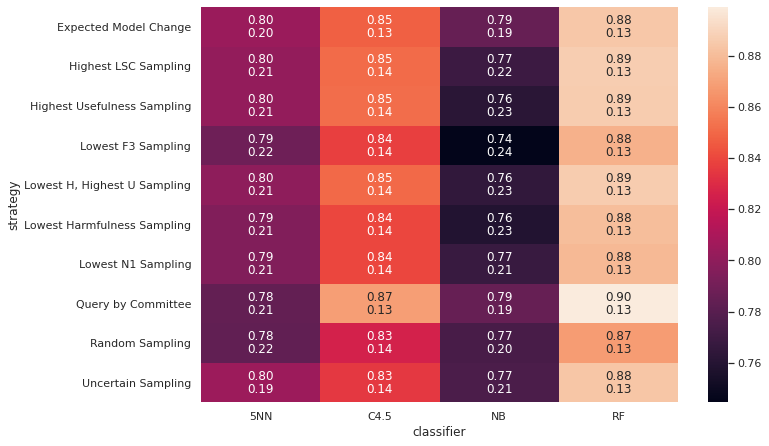

In [98]:
X = pd.pivot_table(df_all, values='accuracy_history', index=['strategy'], columns='classifier')
Y = pd.pivot_table(df_all.groupby(['strategy','classifier']).mean(), values='accuracy_history', index=['strategy'], columns='classifier')
Z = pd.pivot_table(df_all.groupby(['strategy','classifier']).std(), values='accuracy_history', index=['strategy'], columns='classifier')

sns.heatmap(X, annot=False)
sns.heatmap(X, annot=Y, annot_kws={'va':'bottom'}, fmt=".2f", cbar=False)
sns.heatmap(X, annot=Z, annot_kws={'va':'top'}, fmt=".2f", cbar=False)

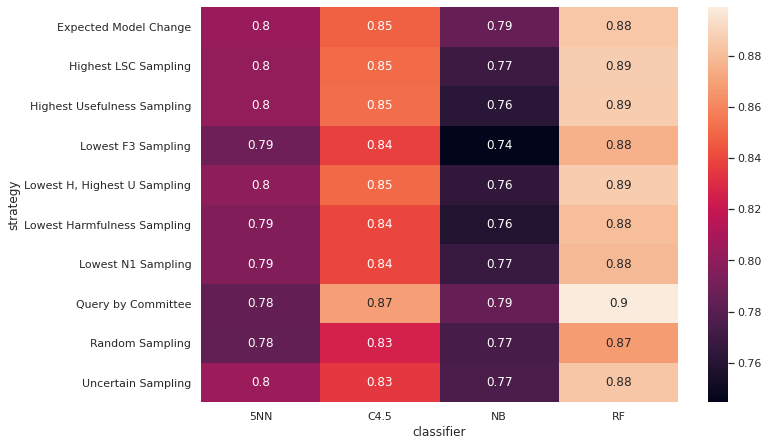

In [86]:
heatmap_data = pd.pivot_table(df_all[(df_all.strategy != 'Expected Error Reduction')], values='accuracy_history', index=['strategy'], columns='classifier')

_ = sns.heatmap(heatmap_data, annot=True)
# ax = sns.heatmap(flights)

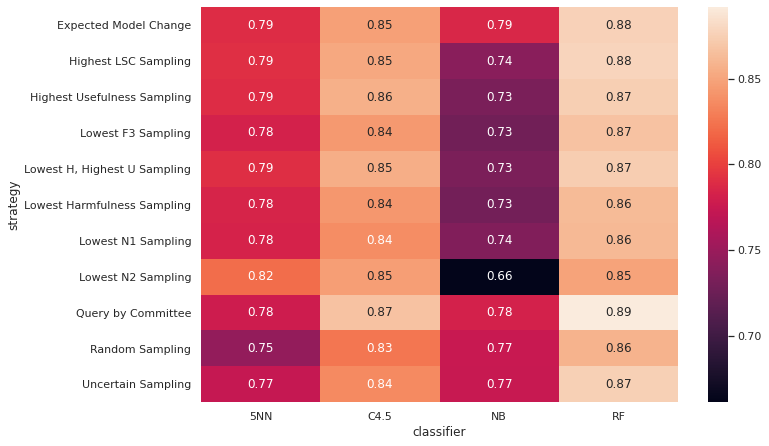

In [23]:
heatmap_data = pd.pivot_table(df_all[(df_all.strategy != 'Expected Error Reduction')], values='f1_history', index=['strategy'], columns='classifier')

_ = sns.heatmap(heatmap_data, annot=True)
# ax = sns.heatmap(flights)

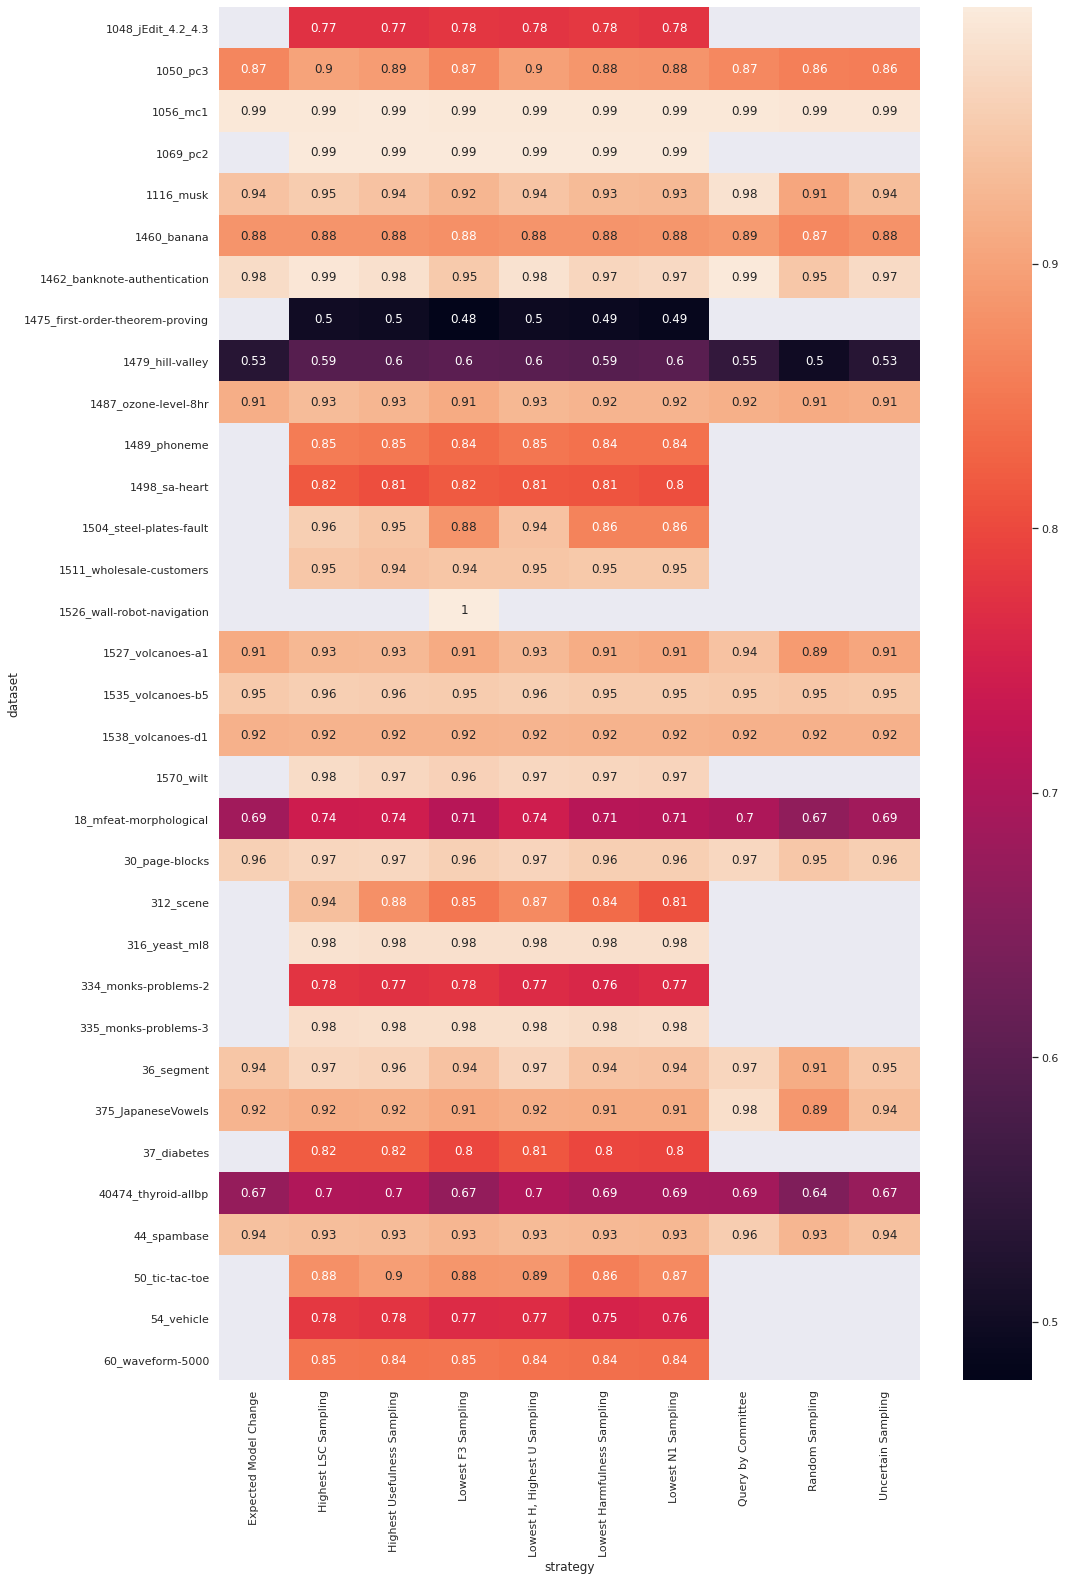

In [24]:
sns.set(rc={'figure.figsize':(15.7,25.27)})
heatmap_data = pd.pivot_table(df_all[(df_all.strategy != 'Expected Error Reduction') & (df_all.strategy != 'Lowest N2 Sampling') & (df_all.classifier == "RF")], values='f1_history', index=['dataset'], columns='strategy')

_ = sns.heatmap(heatmap_data, annot=True)
# ax = sns.heatmap(flights)

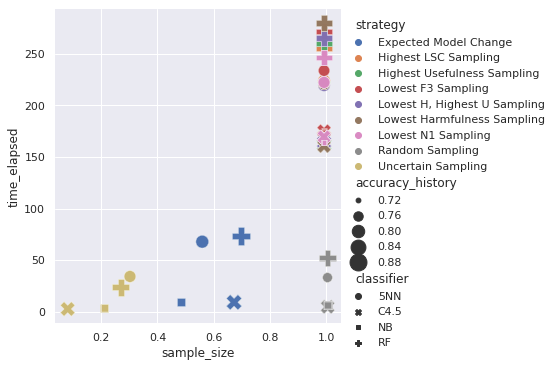

In [25]:
g = sns.relplot(
    data= df_all[(df_all.strategy != 'Query by Committee') & (df_all.strategy != 'Expected Error Reduction') & (df_all.strategy != 'Lowest N2 Sampling')].groupby(["strategy","classifier", "cost"]).mean(),
    x="sample_size", y="time_elapsed",
    hue="strategy", size="accuracy_history",
    style = "classifier",
    palette=sns.color_palette(n_colors=len(df_all.strategy.unique()) -2), sizes=(0.5, 300), alpha=0.3
)
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
_ = g.despine(left=True, bottom=True)

In [207]:
df = df_all.groupby(['dataset','strategy']).mean()
df["rank"] = df.groupby("dataset")["accuracy_history"].rank(ascending = False)
#df.groupby('strategy').mean()
df.head(30)

time_elapsed  sample_size  \
dataset   strategy                                                  
1050_pc3  Expected Model Change            22.305319     0.433781   
          Highest LSC Sampling            201.194452     0.992800   
          Highest Usefulness Sampling     173.204235     0.992800   
          Lowest F3 Sampling              190.006678     0.992800   
          Lowest H, Highest U Sampling    186.418944     0.992800   
          Lowest Harmfulness Sampling     172.900441     0.992800   
          Lowest N1 Sampling              195.083892     0.992800   
          Query by Committee              331.618745     2.349328   
          Random Sampling                  14.791158     1.012796   
          Uncertain Sampling                7.978815     0.168426   
1056_mc1  Expected Model Change            51.094740     0.402947   
          Highest LSC Sampling            224.694866     0.998547   
          Highest Usefulness Sampling     224.546327     0.998547   
          Lowest F3 Sampling              220.449860     0.998547   
          Lowest H, Highest U Sampling    234.964177     0.998547   
          Lowest Harmfulness Sampling     220.297366     0.998547   
          Lowest N1 Sampling              228.465733     0.998547   
          Query by Committee              755.651348     2.340799   
          Random Sampling                  28.594951     0.985105   
          Uncertain Sampling               20.140641     0.089985   
1116_musk Expected Model Change           116.796884     0.865111   
          Highest LSC Sampling            439.738049     0.996779   
          Highest Usefulness Sampling     489.201198     0.996779   
          Lowest F3 Sampling              516.680264     0.996779   
          Lowest H, Highest U Sampling    470.199022     0.996779   
          Lowest Harmfulness Sampling     476.387830     0.996779   
          Lowest N1 Sampling              426.376466     0.996779   
          Query by Committee             1176.671777     2.337981   
          Random Sampling                  73.975084     0.985602   
          Uncertain Sampling               38.520193     0.129888   

                                        accuracy_history  f1_history  \
dataset   strategy                                                     
1050_pc3  Expected Model Change                 0.817799    0.811660   
          Highest LSC Sampling                  0.765882    0.775812   
          Highest Usefulness Sampling           0.750479    0.755086   
          Lowest F3 Sampling                    0.748873    0.735561   
          Lowest H, Highest U Sampling          0.763074    0.770860   
          Lowest Harmfulness Sampling           0.744628    0.746435   
          Lowest N1 Sampling                    0.784908    0.794273   
          Query by Committee                    0.834665    0.831402   
          Random Sampling                       0.810179    0.798921   
          Uncertain Sampling                    0.776871    0.767990   
1056_mc1  Expected Model Change                 0.981607    0.984494   
          Highest LSC Sampling                  0.971133    0.977066   
          Highest Usefulness Sampling           0.986293    0.987812   
          Lowest F3 Sampling                    0.971092    0.972360   
          Lowest H, Highest U Sampling          0.986575    0.987746   
          Lowest Harmfulness Sampling           0.979071    0.983116   
          Lowest N1 Sampling                    0.979842    0.983588   
          Query by Committee                    0.976660    0.982382   
          Random Sampling                       0.967947    0.971344   
          Uncertain Sampling                    0.979445    0.983100   
1116_musk Expected Model Change                 0.960907    0.959502   
          Highest LSC Sampling                  0.962843    0.963334   
          Highest Usefulness Sampling           0.962127    0.961797   
          Lowest F3 Sampling   

In [217]:
df.groupby('strategy').mean().rank(method = 'first',ascending=True).sort_values(by='rank', ascending=True)['rank']

strategy
Expected Model Change            1.0
Highest LSC Sampling             2.0
Query by Committee               3.0
Highest Usefulness Sampling      4.0
Lowest H, Highest U Sampling     5.0
Uncertain Sampling               6.0
Lowest Harmfulness Sampling      7.0
Lowest N1 Sampling               8.0
Random Sampling                  9.0
Lowest F3 Sampling              10.0
Name: rank, dtype: float64